In [12]:
# read the image 

import skimage
from skimage import io

coll= io.ImageCollection(r'C:\Users\ASUS ROG\Study Python\Mobile Mapping and Navigation System\Semester 1\Image Recognation and Deep Machine Learning\Project2\data_study'+'\k*.tif')
coll.files

['C:\\Users\\ASUS ROG\\Study Python\\Mobile Mapping and Navigation System\\Semester 1\\Image Recognation and Deep Machine Learning\\Project2\\data_study\\k1.tif',
 'C:\\Users\\ASUS ROG\\Study Python\\Mobile Mapping and Navigation System\\Semester 1\\Image Recognation and Deep Machine Learning\\Project2\\data_study\\k2.tif',
 'C:\\Users\\ASUS ROG\\Study Python\\Mobile Mapping and Navigation System\\Semester 1\\Image Recognation and Deep Machine Learning\\Project2\\data_study\\k3.tif',
 'C:\\Users\\ASUS ROG\\Study Python\\Mobile Mapping and Navigation System\\Semester 1\\Image Recognation and Deep Machine Learning\\Project2\\data_study\\k4.tif',
 'C:\\Users\\ASUS ROG\\Study Python\\Mobile Mapping and Navigation System\\Semester 1\\Image Recognation and Deep Machine Learning\\Project2\\data_study\\k5.tif',
 'C:\\Users\\ASUS ROG\\Study Python\\Mobile Mapping and Navigation System\\Semester 1\\Image Recognation and Deep Machine Learning\\Project2\\data_study\\k6.tif',
 'C:\\Users\\ASUS ROG\

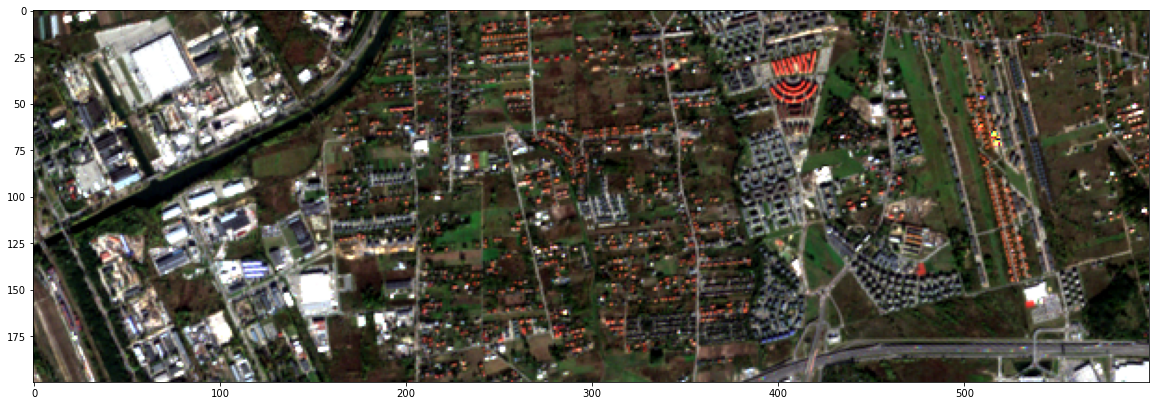

In [13]:
# visualisation of the image
import numpy as np
from skimage import exposure
from matplotlib import pyplot as plt

# color composition
im_comp=np.dstack([coll[3]/coll[3].max(), coll[2]/coll[2].max(), coll[1]/coll[1].max()])

# histogram equalization
for i in range(3):
    v_min, v_max = np.percentile(im_comp[:,:,i],(1,98))
    im_comp[:,:,i] = exposure.rescale_intensity(im_comp[:,:,i],in_range=(v_min,v_max))
    #return im_comp

plt.figure(figsize=(20,10))
plt.imshow(im_comp)
io.show()

In [18]:
# loading training data

p_water = np.loadtxt(r'C:\Users\ASUS ROG\Study Python\Mobile Mapping and Navigation System\Semester 1\Image Recognation and Deep Machine Learning\Project2\data\water.txt',dtype='int')
p_builtup = np.loadtxt(r'C:\Users\ASUS ROG\Study Python\Mobile Mapping and Navigation System\Semester 1\Image Recognation and Deep Machine Learning\Project2\data\built-up.txt',dtype='int')
p_lveg = np.loadtxt(r'C:\Users\ASUS ROG\Study Python\Mobile Mapping and Navigation System\Semester 1\Image Recognation and Deep Machine Learning\Project2\data\low_vegetation.txt',dtype='int')
p_trees = np.loadtxt(r'C:\Users\ASUS ROG\Study Python\Mobile Mapping and Navigation System\Semester 1\Image Recognation and Deep Machine Learning\Project2\data\trees.txt',dtype='int')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


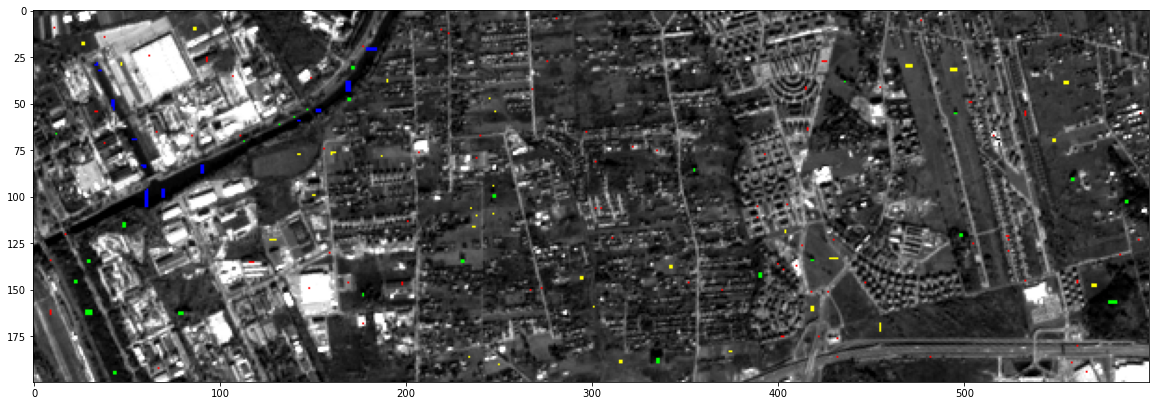

In [19]:
# visualisation of the training points

from skimage.color import rgb2gray
im_comp_p = np.zeros(im_comp.shape)
im_comp_p[:,:,0] = rgb2gray(im_comp)
im_comp_p[:,:,1] = rgb2gray(im_comp)
im_comp_p[:,:,2] = rgb2gray(im_comp)

# water
im_comp_p[p_water[:,0],p_water[:,1],0] = 0
im_comp_p[p_water[:,0],p_water[:,1],1] = 0
im_comp_p[p_water[:,0],p_water[:,1],2] = 255

# low vegetation
im_comp_p[p_lveg[:,0],p_lveg[:,1],0] = 255
im_comp_p[p_lveg[:,0],p_lveg[:,1],1] = 255
im_comp_p[p_lveg[:,0],p_lveg[:,1],2] = 0

# trees
im_comp_p[p_trees[:,0],p_trees[:,1],0] = 0
im_comp_p[p_trees[:,0],p_trees[:,1],1] = 255
im_comp_p[p_trees[:,0],p_trees[:,1],2] = 0

# built-up
im_comp_p[p_builtup[:,0],p_builtup[:,1],0] = 255
im_comp_p[p_builtup[:,0],p_builtup[:,1],1] = 0
im_comp_p[p_builtup[:,0],p_builtup[:,1],2] = 0

plt.figure(figsize=(20,10))
plt.imshow(im_comp_p)

### 2. Data transformation for supervised classification


In [20]:
# water

# step 1:
channels=[]
for i in range(len(coll)):
    channel = np.asarray(coll[i].data)[p_water[:,0],p_water[:,1]]
    channels.append(channel)
    
# step 2:
X_water = np.stack(channels).T

print(X_water.shape)


# low_vegetation

# step 1:
channels=[]
for i in range(len(coll)):
    channel = np.asarray(coll[i].data)[p_lveg[:,0],p_lveg[:,1]]
    channels.append(channel)
    
# step 2:
X_lveg = np.stack(channels).T

# low_vegetation

# step 1:
channels=[]
for i in range(len(coll)):
    channel = np.asarray(coll[i].data)[p_trees[:,0],p_trees[:,1]]
    channels.append(channel)
    
# step 2:
X_trees = np.stack(channels).T


# built-up 

# step 1:
channels=[]
for i in range(len(coll)):
    channel = np.asarray(coll[i].data)[p_builtup[:,0],p_builtup[:,1]]
    channels.append(channel)
    
# step 2:
X_builtup = np.stack(channels).T


(100, 13)


In [21]:
# stacking class data into one array
X = np.vstack((X_water,X_lveg,X_trees,X_builtup))
print(X)
n_water = np.ones((X_water.shape[0],1))
#print(n_water)
n_lveg = 3*np.ones((X_lveg.shape[0],1))
n_trees = 4*np.ones((X_trees.shape[0],1))
n_builtup = 2*np.ones((X_builtup.shape[0],1))

Y = np.vstack([n_water,n_lveg,n_trees,n_builtup])

[[1460 1008  682 ...   13  427  224]
 [1460 1002  697 ...   13  427  224]
 [1600 1126  871 ...    9  610  374]
 ...
 [1690 1414 1123 ...   13 2269 2409]
 [1707 1524 1265 ...    9 1405 1183]
 [1935 1554 1348 ...   14 1592 1368]]


### 3. Training a classifier

#### SVM

In [22]:
# Doing train and tes split method with the test size is 0.33 or 33% of the data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [23]:
# using SVM method to do fit and predict of the data

from sklearn import svm

svm = svm.SVC(kernel='linear').fit(X_train, y_train)


C:\Users\ASUS ROG\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [24]:
# data transformation
channels=[]
for i in range(len(coll)):
    channel=np.asarray(coll[i].data).flatten()
    channels.append(channel)
    
X_all = np.stack(channels).T

In [25]:
# predic the data
pred_1 = svm.predict (X_all)
pred_1

array([3., 3., 1., ..., 2., 2., 2.])

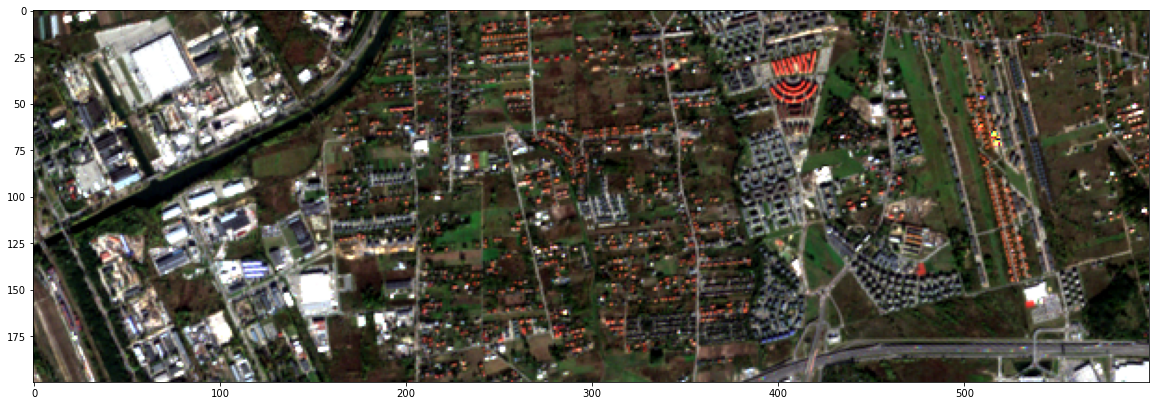

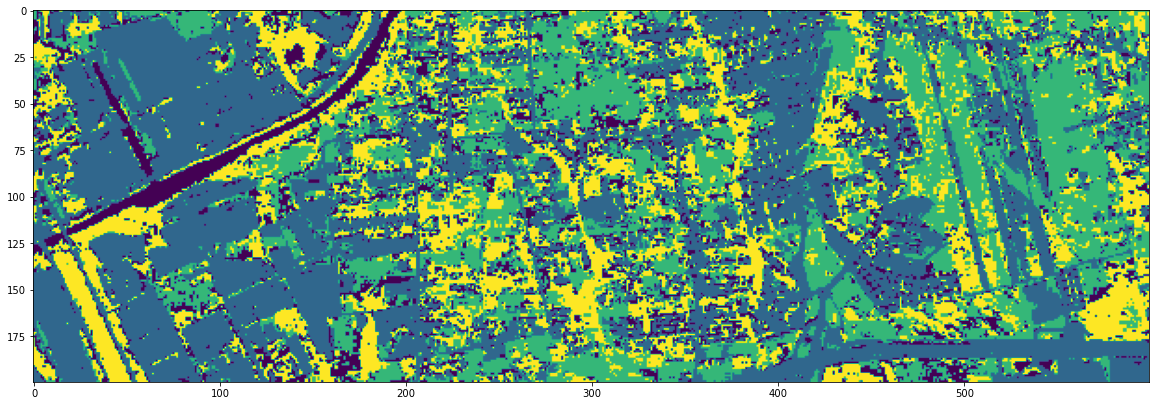

In [26]:
# visualisation of results

# orginal image
plt.figure(figsize=(20,10))
plt.imshow(im_comp)

# classified image
pred_im = pred_1.reshape(coll[0].shape)
plt.figure(figsize=(20,10))
plt.imshow(pred_im)

### Random Forest Classifier 

In [27]:
# using Random Forest method to do fit and predict of the data
'''
basically, A random forest is simply a collection of decision trees whose 
results are aggregated into one final result

''' 
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

model = RandomForestClassifier(criterion='gini',max_depth=5, random_state=0)
model.fit(X_train, y_train)

<ipython-input-27-e7e3876b0dc6>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


RandomForestClassifier(max_depth=5, random_state=0)

In [28]:
# data transformation
channels=[]
for i in range(len(coll)):
    channel=np.asarray(coll[i].data).flatten()
    channels.append(channel)
    
X_all = np.stack(channels).T

In [29]:
# Predictimg the dataa from random forest

pred_2 = model.predict(X_all)
pred_2

array([3., 3., 3., ..., 2., 2., 2.])

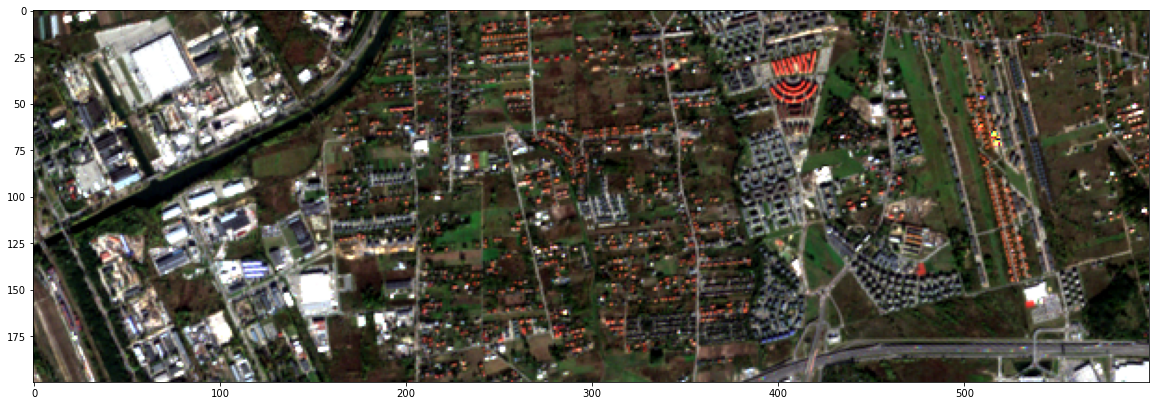

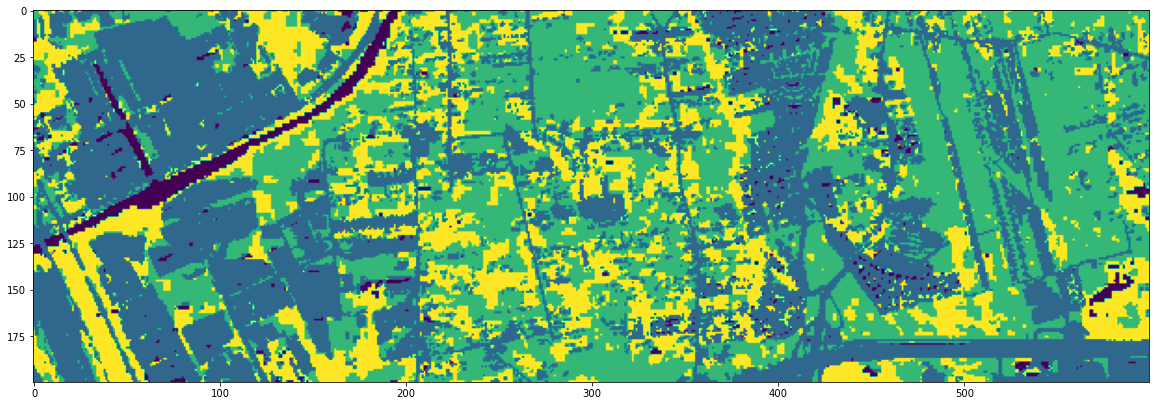

In [30]:
# visualisation of results

# orginal image
plt.figure(figsize=(20,10))
plt.imshow(im_comp)

# classified image
pred_im_2 = pred_2.reshape(coll[0].shape)
plt.figure(figsize=(20,10))
plt.imshow(pred_im_2)

### 4. Transformation and classification of the whole image

In [35]:
import numpy as np

p_val = np.loadtxt(r'C:\Users\ASUS ROG\Study Python\Mobile Mapping and Navigation System\Semester 1\Image Recognation and Deep Machine Learning\Project2\data\test_points.txt',dtype='int')

# running script with auxiliary functions
%run functions.ipynb

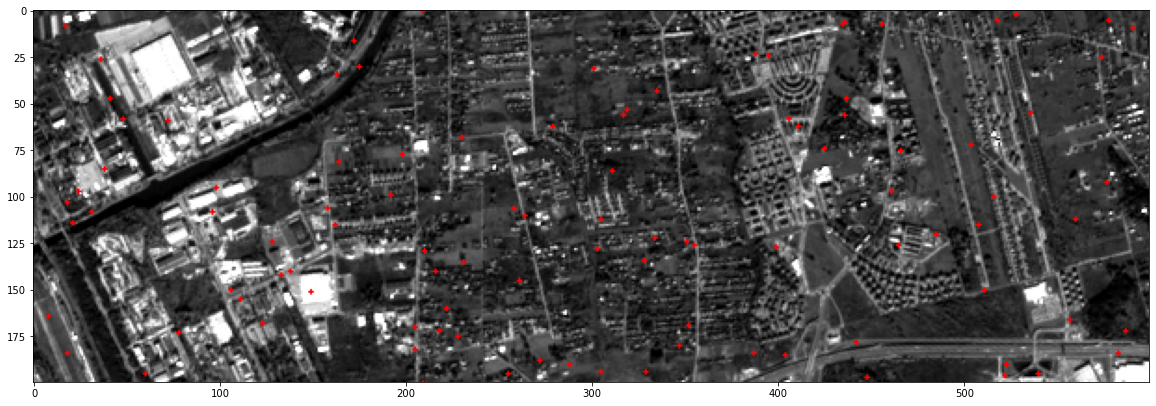

In [36]:
# displaying test/validation points

im_comp_pval = visualize_points(im_comp,p_val)

plt.figure(figsize=(20,10))
plt.imshow(im_comp_pval)

### 6. Classification results assessment (validation)

#### SVM

Overall accuracy: 78.0%:


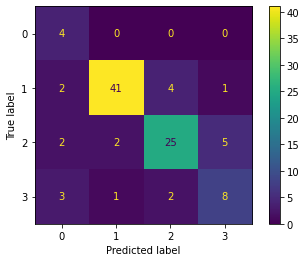

In [37]:
# reading classes of points from SVM results
pred_val_1 = pred_im[p_val[:,0],p_val[:,1]]

# overall accuracy
from sklearn.metrics import accuracy_score
ovAcc = accuracy_score(p_val[:,2],pred_val_1)
print("Overall accuracy: " + str(100*ovAcc) + "%:")

# confusion matrix
from sklearn.metrics import confusion_matrix
confM = confusion_matrix(p_val[:,2],pred_val_1)

# visualisation of the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confM)
disp.plot()

### Random Forest Classifier 

Overall accuracy: 84.0%:


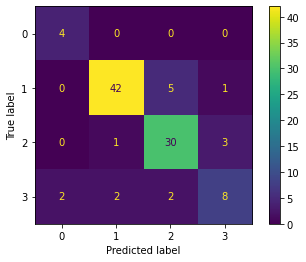

In [38]:
# reading classes of points from Random Forest Classifier classification results
pred_val_2 = pred_im_2[p_val[:,0],p_val[:,1]]

# overall accuracy
from sklearn.metrics import accuracy_score
ovAcc = accuracy_score(p_val[:,2],pred_val_2)
print("Overall accuracy: " + str(100*ovAcc) + "%:")

# confusion matrix
from sklearn.metrics import confusion_matrix
confM = confusion_matrix(p_val[:,2],pred_val_2)

# visualisation of the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confM)
disp.plot()